In [71]:
!export OMP_NUM_THREADS=4

In [72]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from pathlib import Path

## single model

In [73]:
model = 3
workdir = Path(f'work/chaos/lorenz{model}')
if not workdir.exists():
    workdir.mkdir(parents=True)

### model


In [74]:
from model.lorenz import L96
from model.lorenz2 import L05II
from model.lorenz3 import L05III

if model == 1:
    # Lorenz I
    nx = 40
    F = 8.0
    h = 0.05
    step = L96(nx,h,F)
elif model == 2:
    # Lorenz II
    nx = 240
    nk = 8
    h = 0.05
    F = 10.0
    step = L05II(nx,nk,h,F)
elif model==3:
    # Lorenz III
    nx = 960
    nk = 32
    ni = 12
    b = 10.0
    c = 0.6
    h = 0.05 / b
    F = 15.0
    step = L05III(nx,nk,ni,b,c,h,F)

ni=12 alpha=0.124 beta=0.014
nx=960 nk=32
F=15.0 dt=5.000e-03
b=10.0 c=0.6


In [75]:
phi = np.linspace(0.0,2.0*np.pi,nx+1)
x = np.cos(phi)
y = np.sin(phi)

### observation operator

In [76]:
from analysis.obs import Obs
obs = Obs('linear',1.0)

2024-02-08 10:01:07,678 anl INFO operator=linear, obserr=1.0
2024-02-08 10:01:07,679 anl INFO nvars=1


### analysis method

In [77]:
from analysis.envar import EnVAR
ne = 30
analysis = EnVAR(nx,ne,obs,linf=True,infl_parm=1.01)

2024-02-08 10:01:07,683 anl INFO model : model
2024-02-08 10:01:07,683 anl INFO ndim=960 nmem=30
2024-02-08 10:01:07,683 anl INFO pt=envar op=linear sig=1.0 infl_parm=1.01 lsig=-1.0
2024-02-08 10:01:07,684 anl INFO linf=True iloc=None ltlm=False incremental=True


### truth and initial ensemble

In [78]:
z0i = np.zeros(nx)
z0i[nx//2] += F*0.01
for i in range(100*int(0.05/h)):
    z0i = step(z0i)
ne = 30
z0ei = np.zeros((nx,ne))
for j in range(ne):
    z0ei[:,j] = z0i[:]
    z0ei[:,j] = z0i[:] + np.random.randn(nx)*0.1

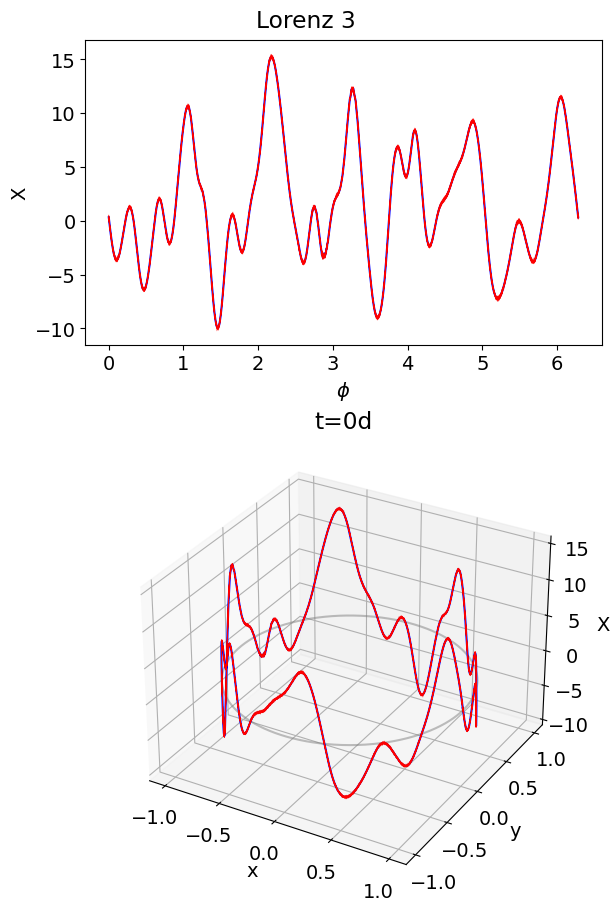

In [79]:
zb = np.hstack((z0i,[z0i[0]]))
zbe = np.vstack((z0ei,z0ei[0].reshape(1,-1)))
t=0.0
fig = plt.figure(figsize=[6,9],constrained_layout=True)
gs0 = gridspec.GridSpec(5,1,figure=fig)
ax0 = fig.add_subplot(gs0[:2,:])
ax1 = fig.add_subplot(gs0[2:,:],projection='3d')
ax0.set_xlabel(r'$\phi$')
ax0.set_ylabel('X')
ax1.plot(x,y,np.zeros_like(x),c='gray',alpha=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])
ax1.set_zlabel('X')
labels = []
lines = []
ax0.plot(phi,zb,c='b',lw=1.5)
ax1.plot(x,y,zb,c='b',lw=1.5)
labels.append('truth')
lines.append(Line2D([0],[0],color='b',lw=1.5))
for i in range(zbe.shape[1]):
    #c = cmap(i)
    c = 'r'
    ax0.plot(phi,zbe[:,i],c=c,lw=0.5,alpha=0.5)
    ax1.plot(x,y,zbe[:,i],c=c,lw=0.5,alpha=0.5)
    if i==0:
        labels.append('ensemble forecast')
        lines.append(Line2D([0],[0],color=c,lw=0.5,alpha=0.5))
ax1.set_title(f't={int(t/0.05/4)}d')
fig.suptitle(f'Lorenz {model}')
fig.savefig(workdir/'chaos_initial.png',dpi=300)
plt.show()

### settings

In [80]:
nt6h = int(0.05/h)
nt24h = nt6h * 4
ntmax = nt24h * 40
nstanl = nt24h * 20 # assimilation start
t = 0.0
time = []
time.append(t)
icycle = 0
cycles = []
cycles.append(icycle)
zt = []
ze = []
za = []
z0 = z0i.copy()
z0e = z0ei.copy()
z0a = z0e.copy()
zt.append(z0)
ze.append(z0e)
za.append(z0a)

2024-02-08 10:01:57,216 anl INFO save_dh=False
2024-02-08 10:01:57,219 anl INFO ==inflation==, alpha=1.01
2024-02-08 10:01:57,234 anl INFO method=CG
2024-02-08 10:01:57,236 anl INFO cgtype: Fletcher-Reeves
2024-02-08 10:01:57,238 anl INFO restart=False
2024-02-08 10:01:57,254 anl INFO save_hist=False
2024-02-08 10:01:57,271 anl INFO jb:0.000000e+00 jo:2.005752e+03
2024-02-08 10:01:57,274 anl INFO |dj|:5.824594e+01
2024-02-08 10:01:57,281 anl INFO jb:1.438769e-02 jo:1.947420e+03
2024-02-08 10:01:57,284 anl INFO |dj|:5.723566e+01
2024-02-08 10:01:57,286 anl INFO jb:3.596922e-01 jo:1.724005e+03
2024-02-08 10:01:57,288 anl INFO |dj|:5.319453e+01
2024-02-08 10:01:57,290 anl INFO jb:6.344970e+00 jo:9.890058e+02
2024-02-08 10:01:57,292 anl INFO |dj|:3.703002e+01
2024-02-08 10:01:57,296 anl INFO jb:4.782303e+01 jo:2.621080e+02
2024-02-08 10:01:57,302 anl INFO |dj|:4.587659e-02
2024-02-08 10:01:57,305 anl INFO jb:4.761093e+01 jo:2.623190e+02
2024-02-08 10:01:57,307 anl INFO |dj|:1.988636e-04
20

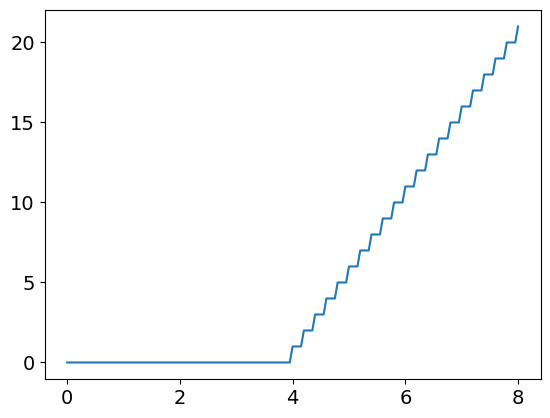

In [81]:
icycle = 0
for i in range(1,ntmax+1):
    t += h
    z0 = step(z0)
    z0e = step(z0e)
    z0a = step(z0a)
    if i % nt6h == 0:
        if i >= nstanl and i % nt24h == 0:
            icycle += 1
            #print(f"{icycle}cycle")
            obsloc = np.arange(0,nx,6)
            yobs = obs.add_noise(obs.h_operator(obsloc,z0))
            z0a,_,_,_,_,_ = analysis(z0a,z0a,yobs,obsloc)
        time.append(t)
        cycles.append(icycle)
        zt.append(z0)
        ze.append(z0e)
        za.append(z0a)
plt.plot(time,cycles)

In [82]:
hours = np.array(time) * 20 * 6
days = hours / 24
print(hours)
print(days)

[  0.   6.  12.  18.  24.  30.  36.  42.  48.  54.  60.  66.  72.  78.
  84.  90.  96. 102. 108. 114. 120. 126. 132. 138. 144. 150. 156. 162.
 168. 174. 180. 186. 192. 198. 204. 210. 216. 222. 228. 234. 240. 246.
 252. 258. 264. 270. 276. 282. 288. 294. 300. 306. 312. 318. 324. 330.
 336. 342. 348. 354. 360. 366. 372. 378. 384. 390. 396. 402. 408. 414.
 420. 426. 432. 438. 444. 450. 456. 462. 468. 474. 480. 486. 492. 498.
 504. 510. 516. 522. 528. 534. 540. 546. 552. 558. 564. 570. 576. 582.
 588. 594. 600. 606. 612. 618. 624. 630. 636. 642. 648. 654. 660. 666.
 672. 678. 684. 690. 696. 702. 708. 714. 720. 726. 732. 738. 744. 750.
 756. 762. 768. 774. 780. 786. 792. 798. 804. 810. 816. 822. 828. 834.
 840. 846. 852. 858. 864. 870. 876. 882. 888. 894. 900. 906. 912. 918.
 924. 930. 936. 942. 948. 954. 960.]
[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25

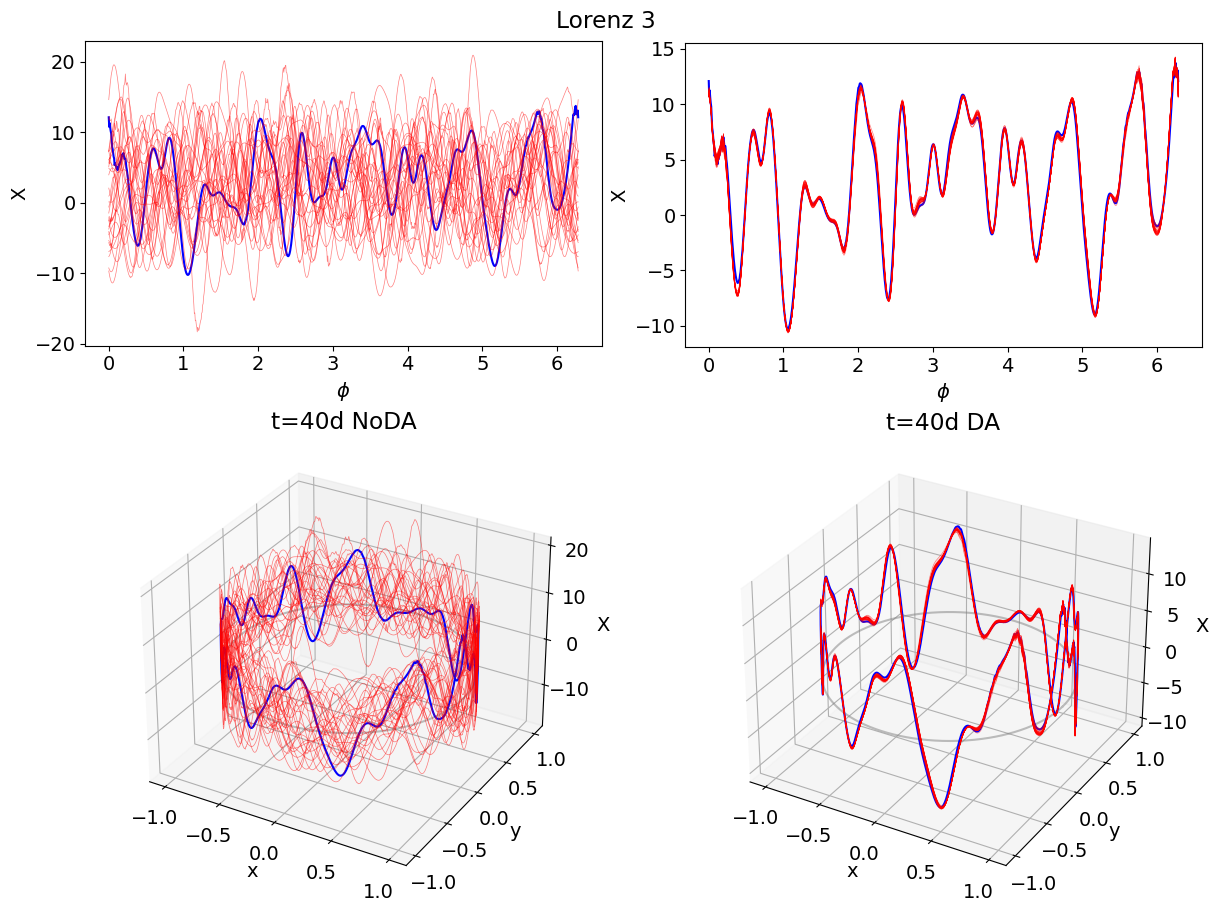

In [83]:
zb = np.hstack((z0,[z0[0]]))
zbe = np.vstack((z0e,z0e[0].reshape(1,-1)))
zba = np.vstack((z0a,z0a[0].reshape(1,-1)))
fig = plt.figure(figsize=[12,9],constrained_layout=True)
gs = gridspec.GridSpec(1,2,figure=fig)
gs0 = gs[0].subgridspec(5,1)
ax0 = fig.add_subplot(gs0[:2,:])
ax1 = fig.add_subplot(gs0[2:,:],projection='3d')
ax0.set_xlabel(r'$\phi$')
ax0.set_ylabel('X')
ax1.plot(x,y,np.zeros_like(x),c='gray',alpha=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
#ax1.set_xticklabels([])
#ax1.set_yticklabels([])
ax1.set_zlabel('X')
gs1 = gs[1].subgridspec(5,1)
ax2 = fig.add_subplot(gs1[:2,:])
ax3 = fig.add_subplot(gs1[2:,:],projection='3d')
ax2.set_xlabel(r'$\phi$')
ax2.set_ylabel('X')
ax3.plot(x,y,np.zeros_like(x),c='gray',alpha=0.5)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
#ax3.set_xticklabels([])
#ax3.set_yticklabels([])
ax3.set_zlabel('X')
labels = []
lines = []
ax0.plot(phi,zb,c='b',lw=1.5)
ax1.plot(x,y,zb,c='b',lw=1.5)
ax2.plot(phi,zb,c='b',lw=1.5)
ax3.plot(x,y,zb,c='b',lw=1.5)
labels.append('truth')
lines.append(Line2D([0],[0],color='b',lw=1.5))
for i in range(zbe.shape[1]):
    #c = cmap(i)
    c = 'r'
    ax0.plot(phi,zbe[:,i],c=c,lw=0.5,alpha=0.5)
    ax1.plot(x,y,zbe[:,i],c=c,lw=0.5,alpha=0.5)
    if i==0:
        labels.append('ensemble forecast')
        lines.append(Line2D([0],[0],color=c,lw=0.5,alpha=0.5))
ax1.set_title(f't={days[-1]:.0f}d NoDA')
for i in range(zba.shape[1]):
    #c = cmap(i)
    c = 'r'
    ax2.plot(phi,zba[:,i],c=c,lw=0.5,alpha=0.5)
    ax3.plot(x,y,zba[:,i],c=c,lw=0.5,alpha=0.5)
    if i==0:
        labels.append('ensemble analysis')
        lines.append(Line2D([0],[0],color=c,lw=0.5,alpha=0.5))
ax3.set_title(f't={days[-1]:.0f}d DA')
fig.suptitle(f'Lorenz {model}')
fig.savefig(workdir/'chaos_da.png',dpi=300)
plt.show()

it=0 icycle=0


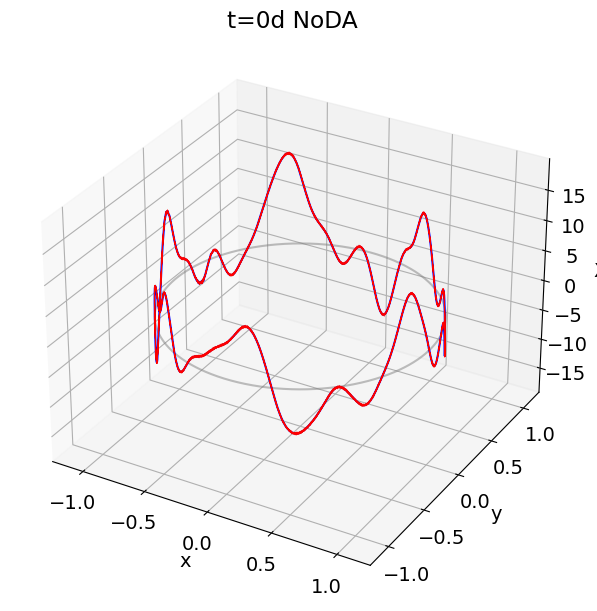

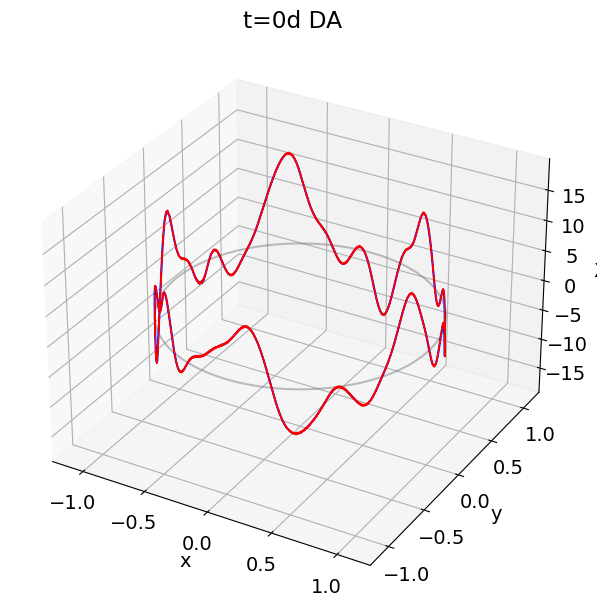

it=20 icycle=0


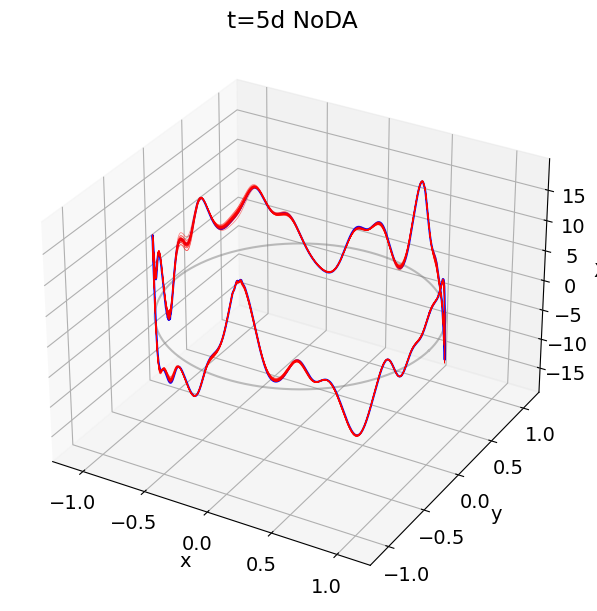

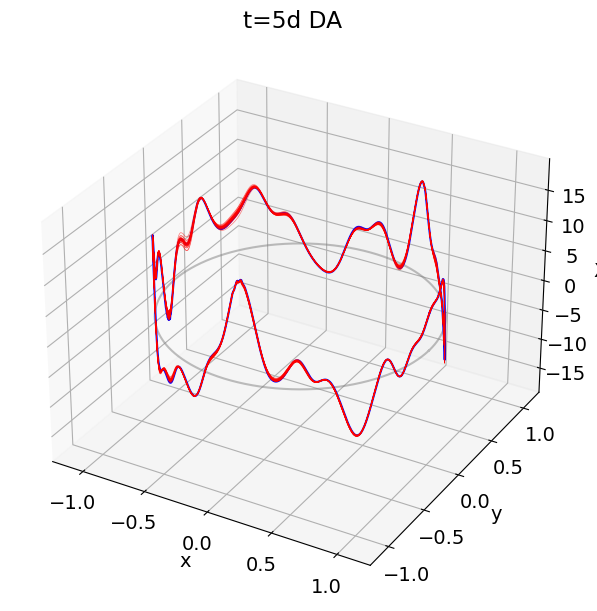

it=40 icycle=0


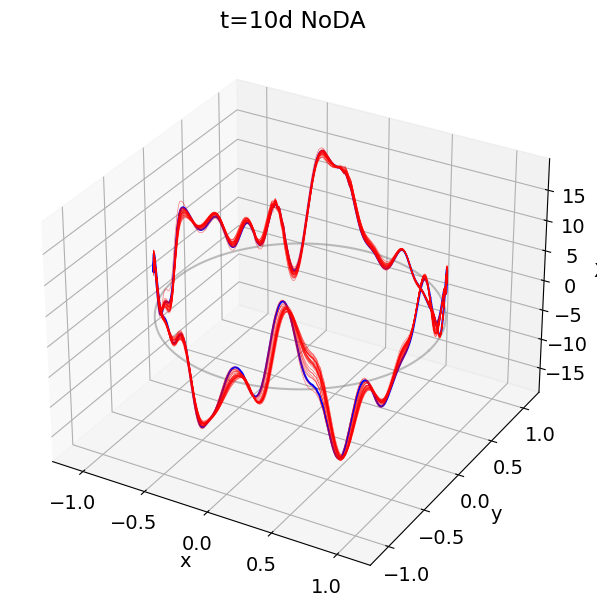

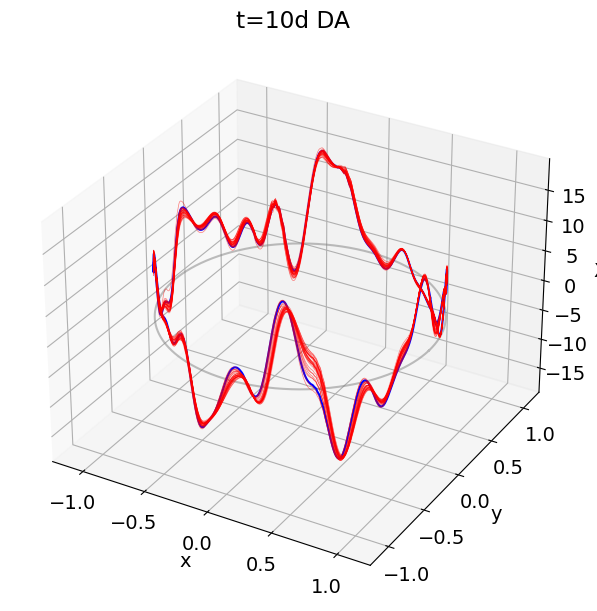

it=60 icycle=0


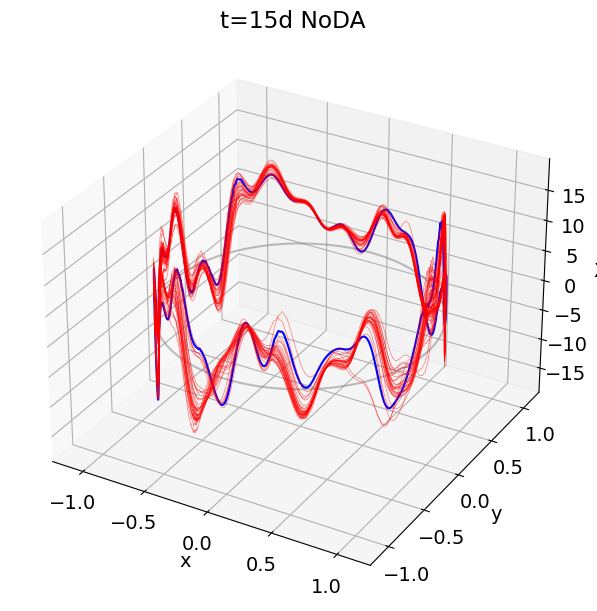

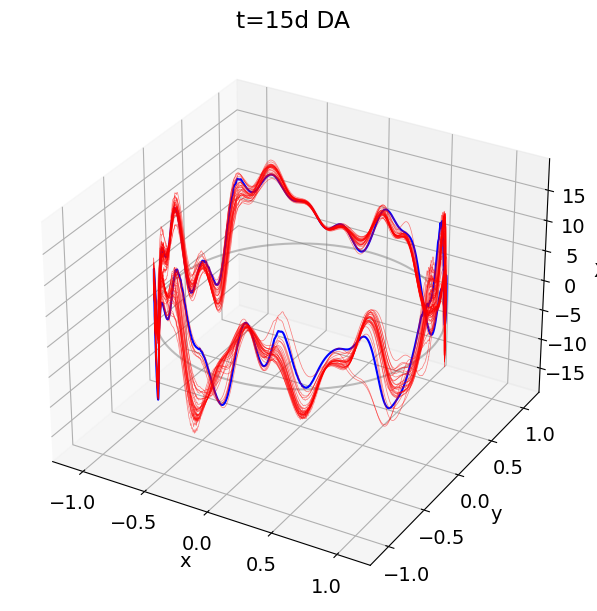

it=80 icycle=1


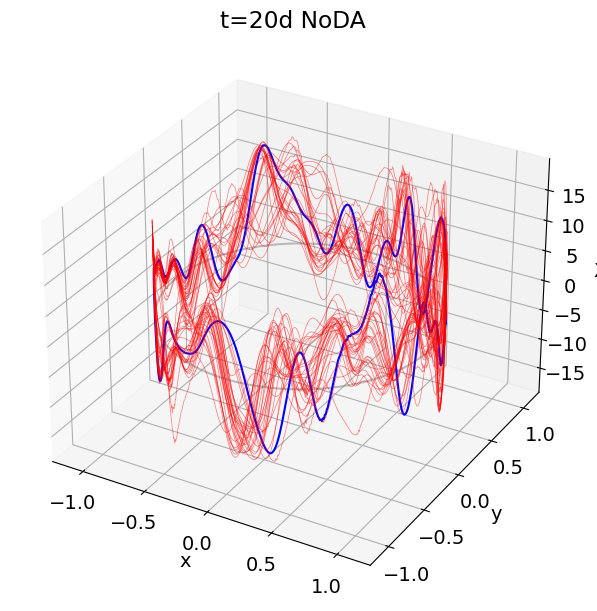

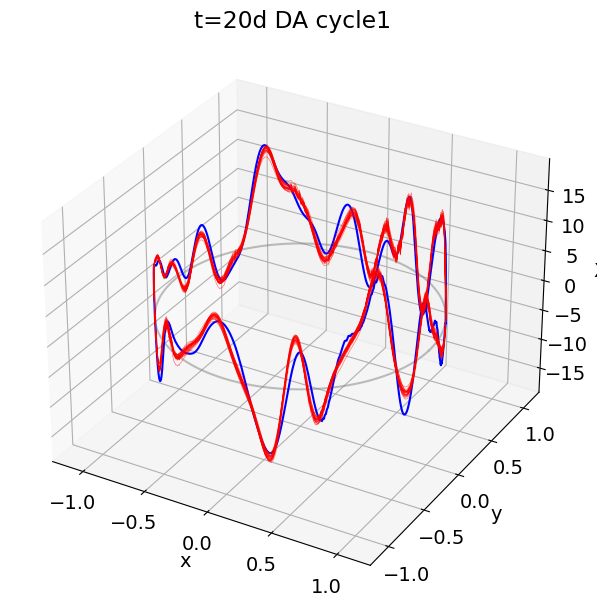

it=100 icycle=6


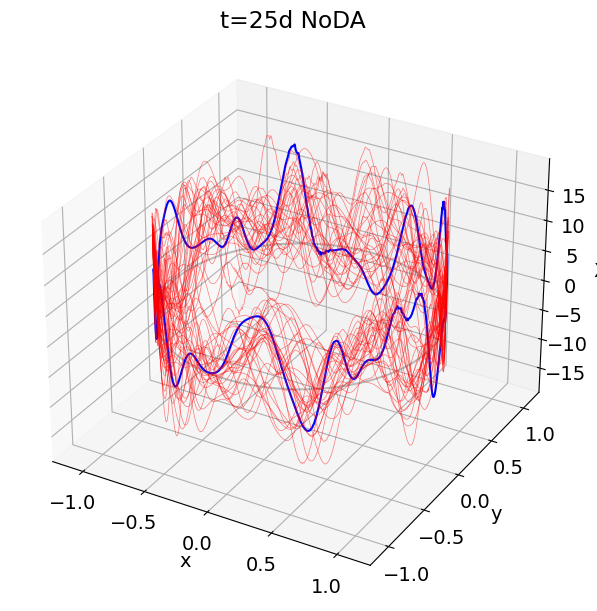

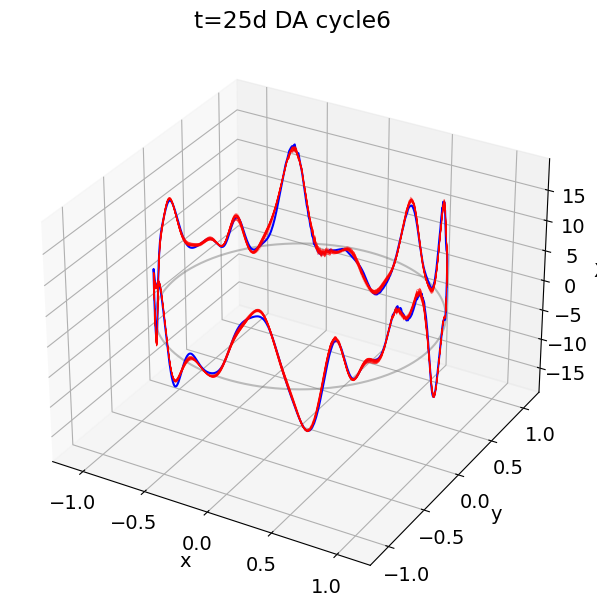

it=120 icycle=11


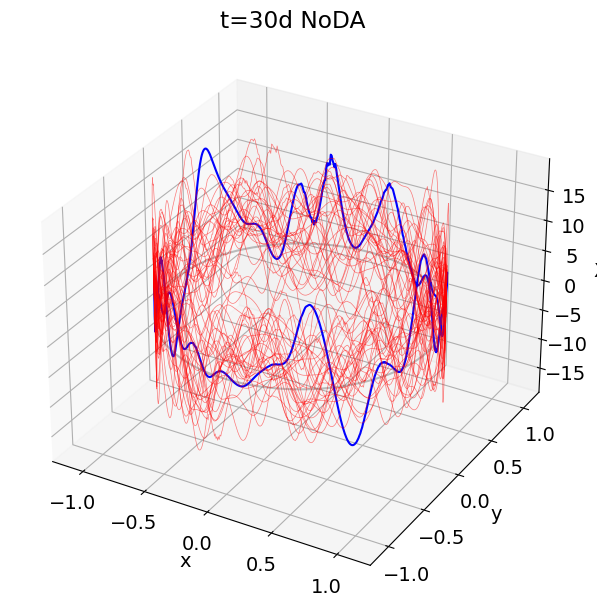

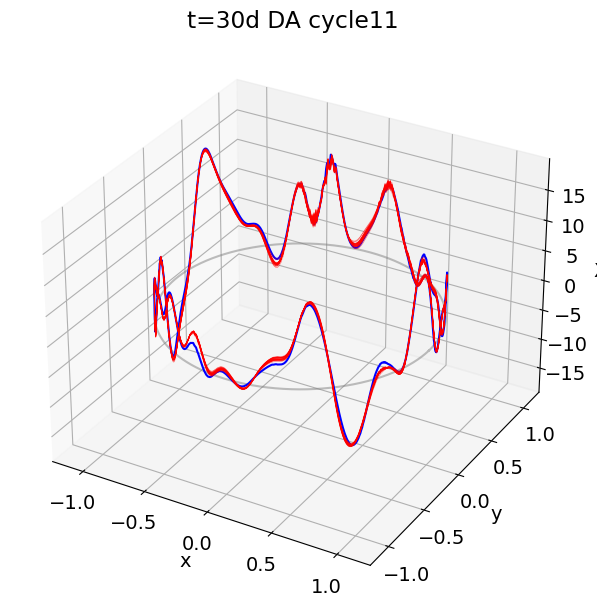

it=140 icycle=16


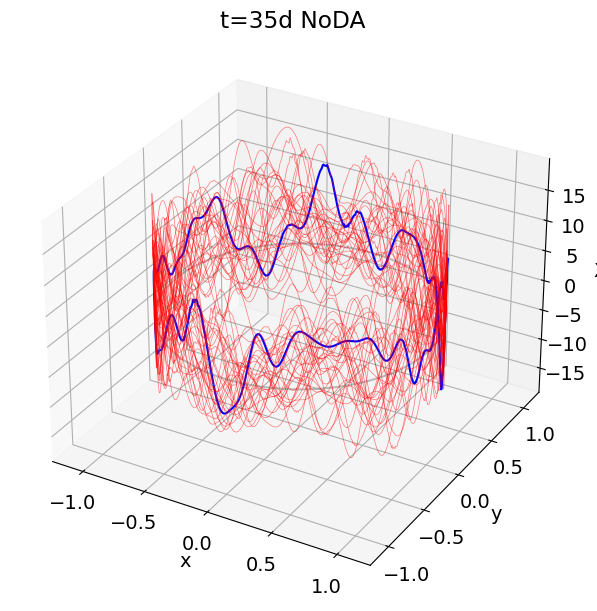

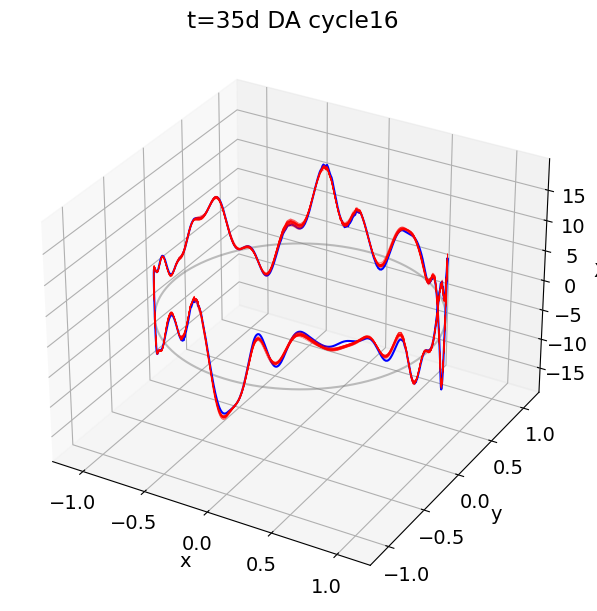

it=160 icycle=21


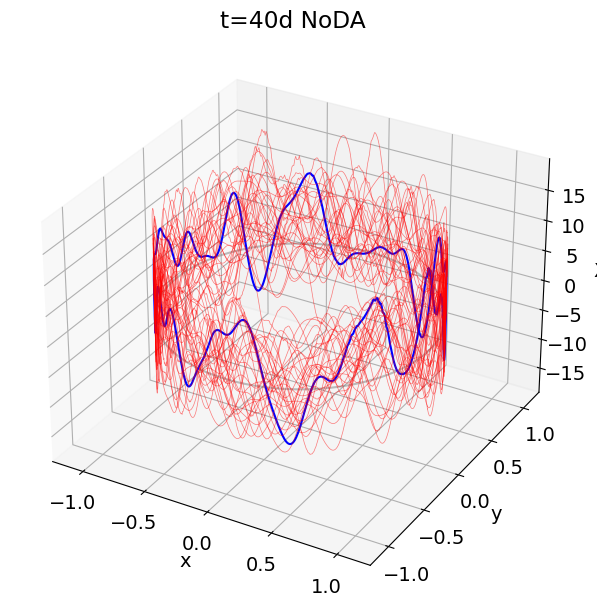

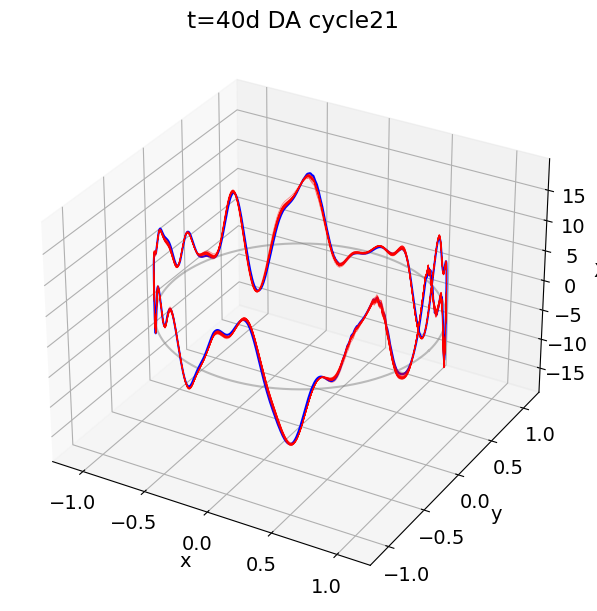

In [85]:
zmin = np.min(np.array(zt))
zmax = np.max(np.array(zt))
dindex = np.arange(0,45,5)
for day in dindex:
    it = np.argmin(np.abs(hours - day*24))
    icycle = cycles[it]
    print(f"it={it} icycle={icycle}")
    zt1 = zt[it]
    ze1 = ze[it]
    za1 = za[it]
    zb = np.hstack((zt1,[zt1[0]]))
    zbe = np.vstack((ze1,ze1[0].reshape(1,-1)))
    zba = np.vstack((za1,za1[0].reshape(1,-1)))
    fig = plt.figure(figsize=[6,6],constrained_layout=True)
    ax = fig.add_subplot(111,projection='3d',\
    autoscale_on=False,xlim=(-1.2,1.2),ylim=(-1.2,1.2),zlim=(zmin-0.1,zmax+0.1))
    ax.plot(x,y,np.zeros_like(x),c='gray',alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.set_zlabel('X')
    labels = []
    lines = []
    ax.plot(x,y,zb,c='b',lw=1.5)
    labels.append('truth')
    lines.append(Line2D([0],[0],color='b',lw=1.5))
    for i in range(zbe.shape[1]):
        #c = cmap(i)
        c = 'r'
        ax.plot(x,y,zbe[:,i],c=c,lw=0.5,alpha=0.5)
        if i==0:
            labels.append('ensemble')
            lines.append(Line2D([0],[0],color=c,lw=0.5,alpha=0.5))
    ax.set_title(f't={days[it]:.0f}d NoDA')
    fig.savefig(workdir/f'chaos_noda_d{day}.png',dpi=300)
    plt.show()
    plt.close()
    fig = plt.figure(figsize=[6,6],constrained_layout=True)
    ax = fig.add_subplot(111,projection='3d',\
    autoscale_on=False,xlim=(-1.2,1.2),ylim=(-1.2,1.2),zlim=(zmin-0.1,zmax+0.1))
    ax.plot(x,y,np.zeros_like(x),c='gray',alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.set_zlabel('X')
    labels = []
    lines = []
    ax.plot(x,y,zb,c='b',lw=1.5)
    labels.append('truth')
    lines.append(Line2D([0],[0],color='b',lw=1.5))
    for i in range(zba.shape[1]):
        #c = cmap(i)
        c = 'r'
        ax.plot(x,y,zba[:,i],c=c,lw=0.5,alpha=0.5)
        if i==0:
            labels.append('ensemble')
            lines.append(Line2D([0],[0],color=c,lw=0.5,alpha=0.5))
    if icycle > 0:
        ax.set_title(f't={days[it]:.0f}d DA cycle{icycle}')
    else:
        ax.set_title(f't={days[it]:.0f}d DA')
    fig.savefig(workdir/f'chaos_da_d{day}.png',dpi=300)
    plt.show()
    plt.close()

### animation

2024-02-08 10:04:05,275 matplotlib.animation INFO Animation.save using <class 'matplotlib.animation.PillowWriter'>


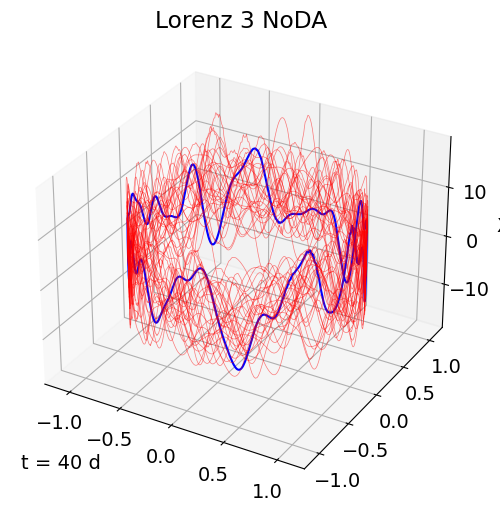

In [86]:
import matplotlib.animation as animation

zmin = np.min(np.array(zt))
zmax = np.max(np.array(zt))
fig= plt.figure(figsize=[6,6])
ax = fig.add_subplot(projection='3d',\
    autoscale_on=False,xlim=(-1.2,1.2),ylim=(-1.2,1.2),zlim=(zmin-0.1,zmax+0.1))
ax.set_zlabel('X')
ax.set_title(f'Lorenz {model} NoDA')
lines = []
truth, = ax.plot([],[],[],c='b',lw=1.5)
lines.append(truth)
for j in range(1,ne+1):
    ensfcst, = ax.plot([],[],[],c='r',lw=0.5,alpha=0.5)
    lines.append(ensfcst)
time_template = 't = %.0f d'
time_text = ax.text(0.05,0.9,20.0,'',\
    va='bottom',ha='left',transform=ax.transAxes)

def animate(i, days, zt, ze, lines):
    t=days[i]
    zt0 = zt[i]
    ze0 = ze[i]
    zb = np.hstack((zt0,[zt0[0]]))
    zbe = np.vstack((ze0,ze0[0,:].reshape(1,-1)))
    for j, line in enumerate(lines):
        line.set_data(x,y)
        if j==0:
            line.set_3d_properties(zb)
        else:
            line.set_3d_properties(zbe[:,j-1])
    time_text.set_text(time_template % t)
    outlist = lines + [time_text]
    return outlist

ani = animation.FuncAnimation(fig, animate, len(ze),\
    fargs=(days,zt,ze,lines), interval=50)
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
ani.save(workdir/'chaos_noda.gif', writer=writer)

plt.show()

2024-02-08 10:04:22,185 matplotlib.animation INFO Animation.save using <class 'matplotlib.animation.PillowWriter'>


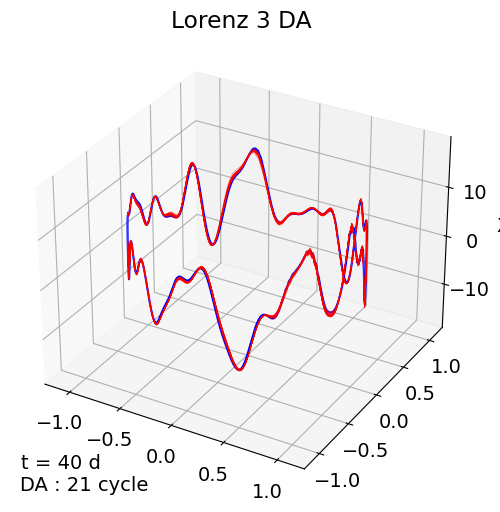

In [88]:
zmin = np.min(np.array(zt))
zmax = np.max(np.array(zt))
fig= plt.figure(figsize=[6,6])
ax = fig.add_subplot(projection='3d',\
    autoscale_on=False,xlim=(-1.2,1.2),ylim=(-1.2,1.2),zlim=(zmin-0.1,zmax+0.1))
ax.set_zlabel('X')
ax.set_title(f'Lorenz {model} DA')
lines = []
truth, = ax.plot([],[],[],c='b',lw=1.5)
lines.append(truth)
for j in range(1,ne+1):
    ensfcst, = ax.plot([],[],[],c='r',lw=0.5,alpha=0.5)
    lines.append(ensfcst)
time_template = 't = %.0f d'
time_text = ax.text(0.05,0.9,20.0,'',\
    va='bottom',ha='left',transform=ax.transAxes)
cycle_template = 'DA : %d cycle'
cycle_text = ax.text(0.05,0.9,-5.0,'',\
    va='bottom',ha='left',transform=ax.transAxes)

def animate(i, days, cycles, zt, za, lines):
    t=days[i]
    icycle=cycles[i]
    zt0 = zt[i]
    za0 = za[i]
    zb = np.hstack((zt0,[zt0[0]]))
    zba = np.vstack((za0,za0[0,:].reshape(1,-1)))
    for j, line in enumerate(lines):
        line.set_data(x,y)
        if j==0:
            line.set_3d_properties(zb)
        else:
            line.set_3d_properties(zba[:,j-1])
    time_text.set_text(time_template % t)
    outlist = lines + [time_text]
    if icycle>0:
        cycle_text.set_text(cycle_template % icycle)
        outlist = outlist + [cycle_text]
    return outlist

ani = animation.FuncAnimation(fig, animate, len(za),\
    fargs=(days,cycles,zt,za,lines), interval=50)
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Me'),
                                 bitrate=1800)
ani.save(workdir/'chaos_da.gif', writer=writer)

plt.show()